#### Loading the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data2.csv')

C:\Users\sonali\AppData\Local\Temp\ipykernel_5864\1329693461.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data2.csv')


#### Data pre-processing

In [4]:
data.shape

(698672, 28)

In [5]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
data.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698658.000000,242948.000000,698659.000000,52153.000000,1769.000000,49.000000,698667.000000,698667.000000
mean,1334.472825,10.722788,1118.660461,1.416985,501.246567,29.949511,305.420253,362.564001,500.985708,956.119418,983.819107,990.163265,33.963516,-117.971348
std,654.221913,6.090015,608.995330,0.493061,208.124380,21.712702,216.573695,123.627487,207.914272,112.844359,52.004591,30.066833,1.937983,6.721274
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429700
50%,1411.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321900
75%,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163600,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


Time of Occurrence (TIME OCC): The time at which crimes occur is recorded in 24-hour military time, with values ranging from 1 to 2359. The mean occurrence time is around 1334 hours (or 1:34 PM), indicating a relatively even distribution throughout the day.

Geographic Area (AREA): The dataset includes incidents from 21 different geographic areas, each corresponding to a specific LAPD community police station. The area IDs range from 1 to 21.

Report District Number (Rpt Dist No): This four-digit code represents sub-areas within each geographic area. The district numbers range from 101 to 2199.

Crime Codes (Crm Cd and Crm Cd Desc): The primary crime code (Crm Cd) identifies the type of crime committed, ranging from 110 to 956. The dataset includes descriptions of these codes, such as "Vehicle - Stolen" or "Burglary from Vehicle."

Victim Age (Vict Age): Victim ages range from -4 to 120 years, with an average age of around 30 years. The presence of negative ages indicates data entry errors or anomalies that need addressing.

Premises Code (Premis Cd): This code represents the type of location where the crime occurred, with values ranging from 101 to 974.

Weapon Used Code (Weapon Used Cd): Approximately 35% of the incidents specify a weapon used, with a mean code value of 362.56, suggesting various types of weapons used in the crimes.

Latitude (LAT) and Longitude (LON): The geographic coordinates are recorded for each incident, with latitude values ranging from 0 to 34.3343 and longitude values from -118.6676 to 0. The mean latitude and longitude are 33.96 and -117.97, respectively. Notably, coordinates at (0, 0) indicate missing or erroneous location data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698672 entries, 0 to 698671
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           698672 non-null  object 
 1   Date Rptd       698668 non-null  object 
 2   DATE OCC        698668 non-null  object 
 3   TIME OCC        698667 non-null  float64
 4   AREA            698667 non-null  float64
 5   AREA NAME       698667 non-null  object 
 6   Rpt Dist No     698667 non-null  float64
 7   Part 1-2        698667 non-null  float64
 8   Crm Cd          698667 non-null  float64
 9   Crm Cd Desc     698667 non-null  object 
 10  Mocodes         602604 non-null  object 
 11  Vict Age        698667 non-null  float64
 12  Vict Sex        607450 non-null  object 
 13  Vict Descent    607446 non-null  object 
 14  Premis Cd       698658 non-null  float64
 15  Premis Desc     698301 non-null  object 
 16  Weapon Used Cd  242948 non-null  float64
 17  Weapon Des

In [9]:
data = data.set_index('DR_NO')

In [10]:
data.isnull().sum()

Date Rptd              4
DATE OCC               4
TIME OCC               5
AREA                   5
AREA NAME              5
Rpt Dist No            5
Part 1-2               5
Crm Cd                 5
Crm Cd Desc            5
Mocodes            96068
Vict Age               5
Vict Sex           91222
Vict Descent       91226
Premis Cd             14
Premis Desc          371
Weapon Used Cd    455724
Weapon Desc       455724
Status                 5
Status Desc            5
Crm Cd 1              13
Crm Cd 2          646519
Crm Cd 3          696903
Crm Cd 4          698623
LOCATION               5
Cross Street      585377
LAT                    5
LON                    5
dtype: int64

In [11]:
data['Crm Cd'].head(3)

DR_NO
190326475    510.0
200106753    330.0
200320258    480.0
Name: Crm Cd, dtype: float64

In [12]:
data['Crm Cd'].fillna(0, inplace = True)

In [13]:
cols_to_fill = ['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
                'Crm Cd Desc', 'Vict Age', 'Premis Cd', 'Status', 'Status Desc', 'Crm Cd 1', 'LAT', 'LON']

In [14]:
for col in cols_to_fill:
  data[col].fillna(data[col].mode()[0], inplace=True)

In [15]:
data['LOCATION'].head(3)

DR_NO
190326475    1900 S  LONGWOOD                     AV
200106753    1000 S  FLOWER                       ST
200320258    1400 W  37TH                         ST
Name: LOCATION, dtype: object

In [16]:
data['LOCATION'].fillna('Unknown', inplace=True)

In [17]:
data.isna().sum()

Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            96068
Vict Age               0
Vict Sex           91222
Vict Descent       91226
Premis Cd              0
Premis Desc          371
Weapon Used Cd    455724
Weapon Desc       455724
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2          646519
Crm Cd 3          696903
Crm Cd 4          698623
LOCATION               0
Cross Street      585377
LAT                    0
LON                    0
dtype: int64

In [18]:
data.loc[data['Weapon Used Cd'].isna(), 'Weapon Used Cd'] = 0

# Fill missing values (NaN) in 'Weapon Desc' column with 'No weapons identified'
data.loc[data['Weapon Desc'].isna(), 'Weapon Desc'] = 'No weapons identified'

In [19]:
data.isnull().sum()

Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            96068
Vict Age               0
Vict Sex           91222
Vict Descent       91226
Premis Cd              0
Premis Desc          371
Weapon Used Cd         0
Weapon Desc            0
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2          646519
Crm Cd 3          696903
Crm Cd 4          698623
LOCATION               0
Cross Street      585377
LAT                    0
LON                    0
dtype: int64

In [20]:
data['Vict Age'].value_counts()

Vict Age
 0.0      169694
 30.0      16025
 35.0      15621
 29.0      15297
 31.0      15249
           ...  
 97.0         47
-2.0          25
-3.0           4
-4.0           3
 120.0         1
Name: count, Length: 104, dtype: int64

In [21]:
data.loc[:,['Date Rptd', 'DATE OCC']].head(20)

,Date Rptd,DATE OCC
DR_NO,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM
231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM
230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM
220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM
231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM


In [22]:
data.loc[:,['Date Rptd', 'DATE OCC']] = data.loc[:,['Date Rptd', 'DATE OCC']].apply(lambda x: x.str[:-12])

In [23]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'], format='%m/%d/%Y', errors='coerce')
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y', errors='coerce')

In [24]:
data['Date Rptd'].head()

DR_NO
190326475   2020-03-01
200106753   2020-02-09
200320258   2020-11-11
200907217   2023-05-10
220614831   2022-08-18
Name: Date Rptd, dtype: datetime64[ns]

#### Reporting delay

In [25]:
data['Reporting Delay'] = (data['Date Rptd'] - data['DATE OCC']).dt.days

In [26]:
data['Reporting Delay'].head()

DR_NO
190326475       0.0
200106753       1.0
200320258       7.0
200907217    1156.0
220614831     731.0
Name: Reporting Delay, dtype: float64

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
data['Reporting Delay'].value_counts()

Reporting Delay
0.0       342812
1.0       150190
2.0        42584
3.0        25011
4.0        16201
           ...  
1484.0         1
1497.0         1
1226.0         1
1464.0         1
851.0          1
Name: count, Length: 1363, dtype: int64

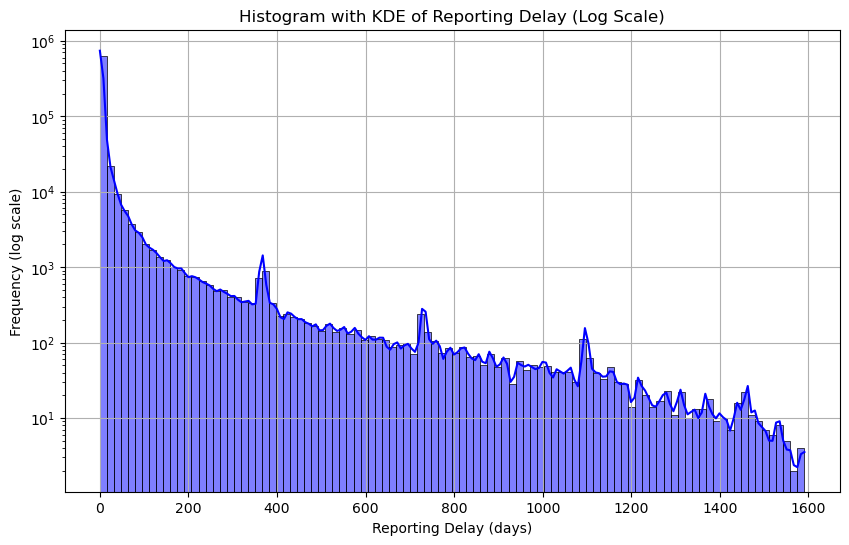

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Reporting Delay'].dropna(), kde=True, bins=100, color='blue', edgecolor='black')
plt.yscale('log')
plt.xlabel('Reporting Delay (days)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram with KDE of Reporting Delay (Log Scale)')
plt.grid(True)

The histogram with KDE (Kernel Density Estimate) of the reporting delay visualizes the distribution of time elapsed between the occurrence of crimes and their reporting. The log scale on the y-axis is used to better represent the wide range of frequencies. The plot reveals how often crimes are reported within different time frames, highlighting both immediate and delayed reporting.

The histogram likely shows a higher concentration of reports with shorter delays, tapering off as delays increase, indicating that most crimes are reported promptly. The use of a log scale on the y-axis helps in visualizing the less frequent, longer delays more clearly, which would otherwise be overshadowed by the high-frequency short delays. This visualization provides valuable insights into reporting behavior and can help in understanding potential delays in crime reporting processes.

#### Victim age distribution

In [30]:
data['Vict Age'].value_counts()

Vict Age
 0.0      169694
 30.0      16025
 35.0      15621
 29.0      15297
 31.0      15249
           ...  
 97.0         47
-2.0          25
-3.0           4
-4.0           3
 120.0         1
Name: count, Length: 104, dtype: int64

The distribution of victim ages reveals several interesting patterns and anomalies. The most frequent value, "0.0," appears 169,694 times, indicating either missing or improperly recorded ages, as zero is not a plausible age for crime victims. The subsequent frequent ages, such as 30, 35, 29, and 31, show a more expected pattern, likely reflecting the demographics of the population in the dataset.

However, there are significant data quality issues indicated by negative ages (-2.0, -3.0, -4.0) and an implausibly high age of 120. These outliers suggest inaccuracies in data entry or transcription errors from the original reports.

#### Distribution of Victim sex

In [31]:
data['Vict Sex'].value_counts()

Vict Sex
M    290101
F    258541
X     58725
H        83
Name: count, dtype: int64

The dataset includes 290,101 male and 258,541 female victims, indicating that both genders are significantly represented in crime reports, with a slightly higher number of male victims.

There are 58,725 entries categorized as 'others,' highlighting the inclusion and acknowledgment of non-binary or other gender identities in the dataset.

#### Filtering out inaccurate age and gender entries

In [32]:
df_filtered = data[(data['Vict Age'] >=1)& (data['Vict Age'].notna())]
df_filtered.loc[:,'Vict Age'].head(10)

DR_NO
200106753    47.0
200320258    19.0
200907217    19.0
220614831    28.0
231808869    41.0
230110144    25.0
220314085    27.0
231309864    24.0
211904005    26.0
221804943    26.0
Name: Vict Age, dtype: float64

In [33]:
df_filtered = df_filtered[(df_filtered['Vict Sex'] != 'H')&(df_filtered['Vict Sex'].notna())]
df_filtered.loc[: ,'Vict Sex'].head(10)

DR_NO
200106753    M
200320258    X
200907217    M
220614831    M
231808869    M
230110144    M
220314085    F
231309864    F
211904005    M
221804943    M
Name: Vict Sex, dtype: object

#### Visualization of Victim age distribution

(0.0, 100.0)

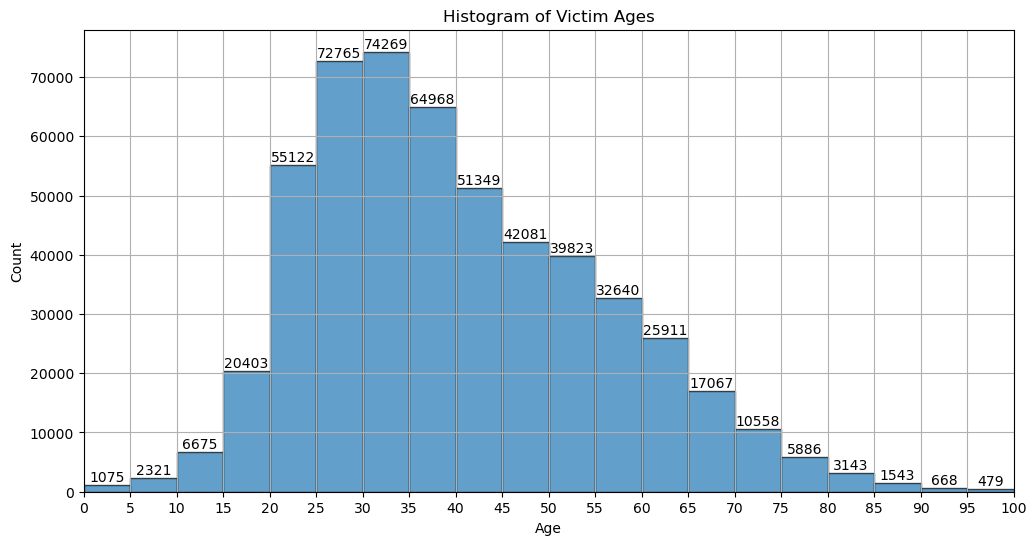

In [34]:
plt.figure(figsize=(12, 6))

hist, bins, _ = plt.hist(df_filtered['Vict Age'], bins=np.arange(0, 101, 5), edgecolor='k', alpha=0.7)
plt.title("Histogram of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Count")

plt.grid(True)

for i in range(len(bins) - 1):
    plt.text(bins[i] + 2.5, hist[i] + 100, str(int(hist[i])), fontsize=10, ha='center', va='bottom')

plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)

The distribution of victim ages reveals significant counts across different age ranges, with a notable peak between ages 30 to 35 years, where the count reaches 74,269, the highest among all age groups. Following closely, ages 25 to 30 years have a count of 72,764, indicating a similar high incidence of crime in this age bracket. The third highest count occurs in the 35 to 40 years age group, with 64,968 instances reported.

The pattern shows a gradual increase in reported incidents from younger ages up to around 35 years, after which the counts decrease steadily towards older ages. This trend suggests that individuals in their early to mid-adult years are more frequently affected by crime, with a decline in reported incidents as age increases beyond the mid-thirties.

#### Visualization of victim gender distribution

Text(0.5, 1.0, 'Victim Gender Distribution')

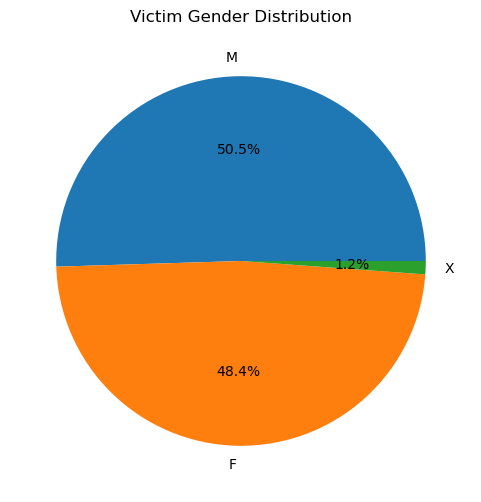

In [35]:
victim_gender_counts = df_filtered['Vict Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(victim_gender_counts, labels=victim_gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.title("Victim Gender Distribution")

This distribution highlights a relatively balanced representation between males and females, with a smaller but significant presence of other gender identities in the dataset.

In [36]:
male_df = df_filtered[df_filtered['Vict Sex'] == 'M']
female_df = df_filtered[df_filtered['Vict Sex'] == 'F']
other_df = df_filtered[df_filtered['Vict Sex'] == 'X']

In [37]:
male_df['Crm Cd Desc'].value_counts().head(10)

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                    28524
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              27648
BURGLARY FROM VEHICLE                                       24053
THEFT OF IDENTITY                                           18592
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     17105
BURGLARY                                                    17066
THEFT PLAIN - PETTY ($950 & UNDER)                          15697
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         14010
ROBBERY                                                     13249
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     9810
Name: count, dtype: int64

In the LAPD dataset, crimes involving male victims show a distinct pattern. The most common crime is "Battery - Simple Assault," indicating a high incidence of physical altercations. This is followed by "Assault with Deadly Weapon, Aggravated Assault," further underscoring the prevalence of violent crimes against men. Property crimes are also significant, with "Burglary from Vehicle," "Theft of Identity," "Vandalism - Felony," and "Burglary" frequently occurring.

These crime types highlight both the physical and property-related risks faced by male victims in Los Angeles.

In [38]:
female_df['Crm Cd Desc'].value_counts().head(10)

Crm Cd Desc
INTIMATE PARTNER - SIMPLE ASSAULT                           26510
THEFT OF IDENTITY                                           25937
BATTERY - SIMPLE ASSAULT                                    25686
BURGLARY FROM VEHICLE                                       18108
THEFT PLAIN - PETTY ($950 & UNDER)                          15327
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     14675
BURGLARY                                                    11374
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              10572
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          8956
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     8171
Name: count, dtype: int64

The most frequent crime type is "Intimate Partner - Simple Assault," highlighting the prevalence of domestic violence issues, followed closely by "Theft of Identity" and "Battery - Simple Assault." Property crimes such as "Burglary from Vehicle," "Theft Plain - Petty (950 dollars & Under)," and "Vandalism - Felony" also feature prominently. Additionally, "Burglary," "Assault with Deadly Weapon, Aggravated Assault," and various forms of theft, including "Theft from Motor Vehicle - Grand (950.01 dollars and Over)" and "Theft-Grand (950.01 dollars & Over) Except Guns, Fowl, Livestock, Products," are significant concerns for female victims. These crime types reflect both personal and property-related threats faced by women in Los Angeles.

In [39]:
other_df['Crm Cd Desc'].value_counts().head(10)

Crm Cd Desc
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    907
BURGLARY                                                    691
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     690
ROBBERY                                                     380
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              333
THEFT PLAIN - PETTY ($950 & UNDER)                          311
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    261
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    241
BATTERY - SIMPLE ASSAULT                                    184
FAILURE TO YIELD                                            179
Name: count, dtype: int64

For individuals identified as "Other" in the LAPD dataset, the most common crime is "Shoplifting - Petty Theft (950 dollars & Under)," indicating a high frequency of minor thefts. This is followed by "Burglary" and "Vandalism - Felony (400 dollars & Over, All Church Vandalisms)," highlighting significant property crimes. "Robbery" and "Assault with Deadly Weapon, Aggravated Assault" suggest the presence of both property and violent crimes. Other notable crimes include "Theft Plain - Petty (950 dollars & Under)," "Vandalism - Misdemeanor (399 dollars or Under)," "Theft-Grand (950.01 dollars & Over) Except Guns, Fowl, Livestock, Products," "Battery - Simple Assault," and "Failure to Yield."

 These crime types demonstrate a mix of property-related and physical offenses affecting this group.

#### Victim descent analysis

In [40]:
print(df_filtered['Vict Descent'].unique())

['O' 'X' 'H' 'B' 'W' 'A' 'C' 'K' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' nan 'G' 'U'
 'D' 'L']


In [41]:
df_filtered = df_filtered[(df_filtered['Vict Descent'] != '-') & (df_filtered['Vict Descent'].notna())]
df_filtered.loc[: ,'Vict Descent'].head(10)

DR_NO
200106753    O
200320258    X
200907217    O
220614831    H
231808869    H
230110144    H
220314085    B
231309864    B
211904005    H
221804943    B
Name: Vict Descent, dtype: object

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

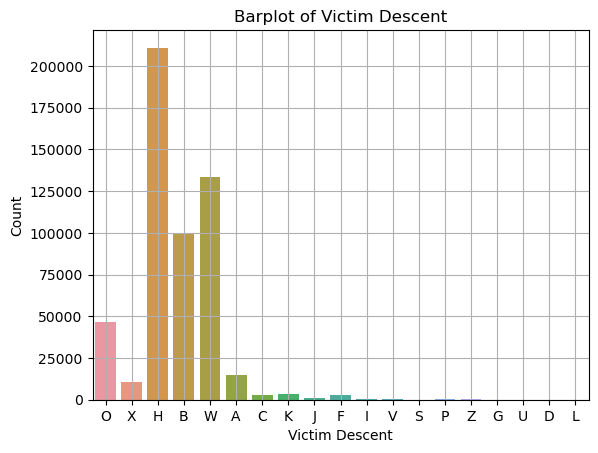

In [42]:
sns.countplot(data=df_filtered, x='Vict Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.title('Barplot of Victim Descent')
plt.grid(True)

The distribution of victim descent categories provides valuable insights into the demographic composition of crime victims in the dataset. Hispanic/Latino individuals (H) are the most frequently reported group, comprising 30.2% of the victims, followed by White (W) victims at 19.3% and Black/African American (B) victims at 11.4%. The "Other" category (O), encompassing unspecified or diverse racial backgrounds, represents 5.4% of victims.

Asian descent categories such as Other Asian (A), Chinese (C), and Korean (K) collectively account for a smaller but notable proportion of victims.

The relatively lower representation of Asian descent categories aligns with demographic data indicating smaller Asian populations compared to Hispanic, White, and Black communities in Los Angeles.

The presence of Unknown (X) descent further underscores data integrity challenges or cases where descent information was not specified, highlighting areas for improved data collection practices.

#### Top crime types

Text(0, 0.5, 'Crime Type')

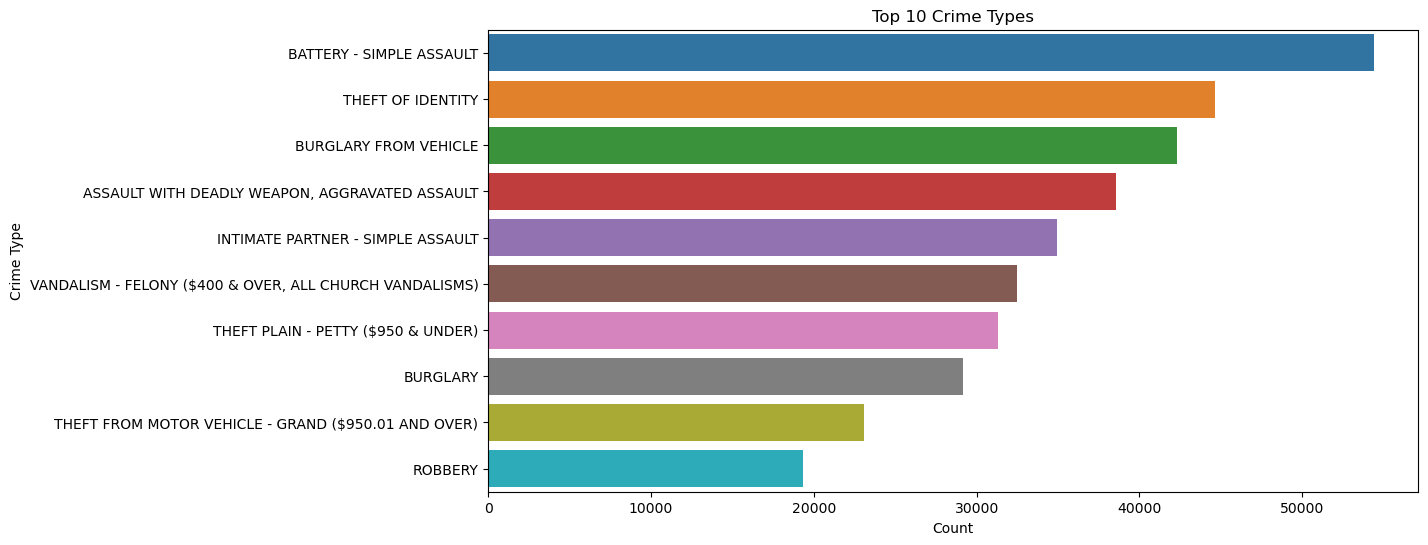

In [43]:
top_crime_types = df_filtered['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_crime_types.values, y=top_crime_types.index, orient="h")

plt.title("Top 10 Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")

The top 10 crime types reported in Los Angeles paint a diverse picture of prevalent criminal activities. Battery - Simple Assault leads, highlighting frequent physical altercations, followed closely by Identity theft, indicating significant concerns over financial fraud and personal data security. Burglary from Vehicle underscores persistent property crime targeting parked cars, while Assault with Deadly Weapon, Aggravated Assault, and Intimate Partner - Simple Assault reveal substantial instances of violence and domestic conflict.

Vandalism - Felony and Petty Theft reflect widespread property damage and minor theft issues, while Burglary and Theft from Motor Vehicle - Grand continue to pose significant security concerns for homes and vehicles. Lastly, Robbery highlights instances of direct confrontation and theft in public settings.

These insights provide an understanding for developing targeted interventions and policies to enhance public safety and address community-specific crime challenges in Los Angeles.

#### Crime occurence over years

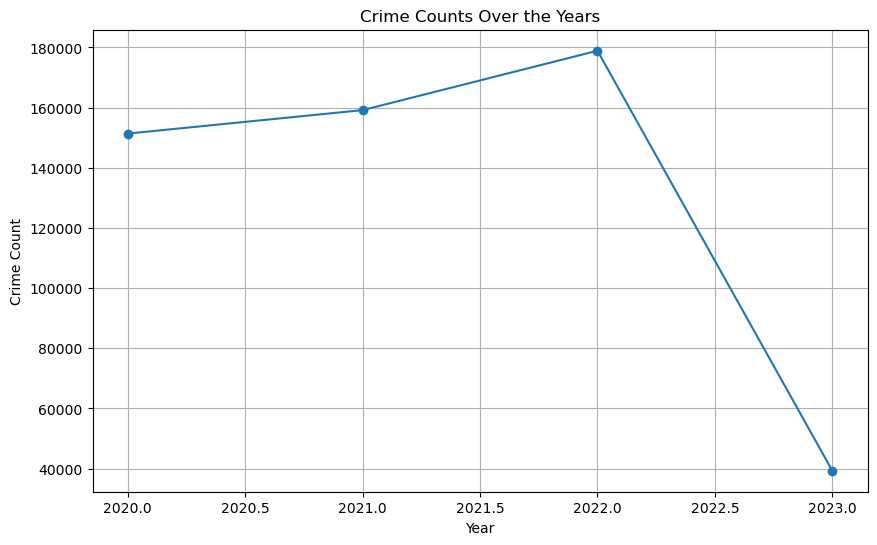

In [44]:
df_filtered['Year'] = df_filtered['DATE OCC'].dt.year
crime_counts_by_year = df_filtered['Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o', linestyle='-')
plt.title("Crime Counts Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True)

The distribution of crime counts across different years in Los Angeles reflects notable trends and changes over time. In 2020, there were 151,373 reported incidents, followed by an increase to 159,167 in 2021, and a further rise to 178,920 in 2022. However, there is a significant drop in reported crimes to 39,284 in 2023. These figures indicate fluctuations in crime rates over the years, influenced by various factors such as economic conditions, social dynamics, and law enforcement efforts.

#### Crime occurence over months

In [45]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
crimes_over_time = data['Date Rptd'].dt.to_period('M').value_counts().sort_index()

In [46]:
crimes_over_time

Date Rptd
2020-01    16060
2020-02    16490
2020-03    15539
2020-04    15179
2020-05    16331
2020-06    16955
2020-07    16907
2020-08    16605
2020-09    15636
2020-10    16142
2020-11    15342
2020-12    15522
2021-01    16155
2021-02    15411
2021-03    16306
2021-04    16015
2021-05    16784
2021-06    17124
2021-07    18741
2021-08    18285
2021-09    18258
2021-10    18952
2021-11    18485
2021-12    17767
2022-01    18399
2022-02    17709
2022-03    19801
2022-04    19769
2022-05    20600
2022-06    20263
2022-07    19756
2022-08    20438
2022-09    19356
2022-10    20106
2022-11    18778
2022-12    20094
2023-01     6798
2023-02     5191
2023-03     5090
2023-04     4957
2023-05     4907
2023-06     4720
2023-07     4990
2023-08     4987
2023-09     4642
2023-10     4891
2023-11     4716
2023-12     4744
2024-01      827
2024-02      385
2024-03      339
2024-04      240
2024-05      162
2024-06       26
Freq: M, Name: count, dtype: int64

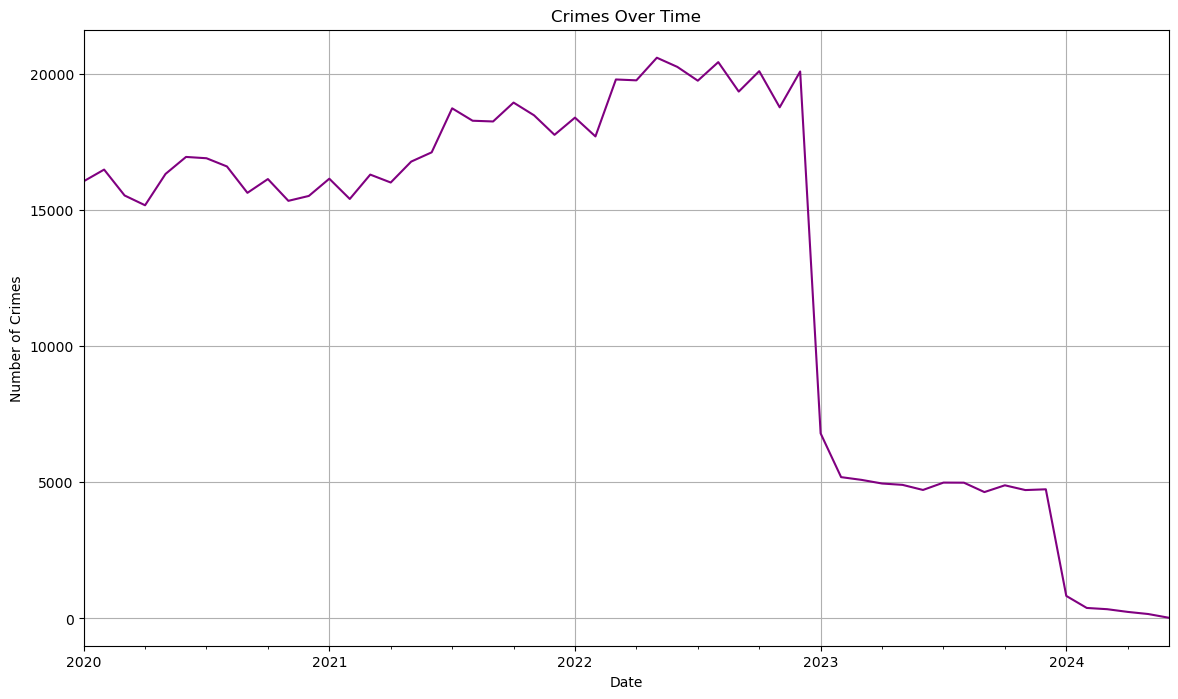

In [47]:
plt.figure(figsize=(14, 8))
crimes_over_time.plot(kind='line', color='purple')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Crimes Over Time')
plt.grid(True)

The monthly crime counts data from January 2020 to June 2024 in Los Angeles reveals distinct patterns and trends:

1. Seasonal Fluctuations: Throughout the years, there are noticeable peaks and troughs in crime reports. For instance, mid-summer months tend to show higher crime counts, possibly linked to increased outdoor activities and social interactions during warmer weather.

2. Yearly Trends: From 2020 to early 2021, crime counts generally remained stable, with fluctuations but no significant upward or downward trends. However, from mid-2021 onwards, there was a noticeable increase in reported crimes, reaching peak levels by late 2021 and continuing into 2022. This trend suggests a period of heightened criminal activity during those years.

3. Recent Decline: A marked decline in crime counts begins in early 2023 and continues into mid-2024. This decline is significant, with crime reports dropping to much lower levels compared to the peaks observed in 2021 and 2022. Factors contributing to this decline could include changes in policing strategies, community interventions, or broader societal shifts affecting crime rates.

#### Occurence of Crime based on day of week

In [48]:
data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format='%H%M', errors = 'coerce')
data['HourOfDay'] = data['TIME OCC'].dt.hour
data['HourOfDay'].head()

DR_NO
190326475    21.0
200106753    18.0
200320258    17.0
200907217    20.0
220614831    12.0
Name: HourOfDay, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

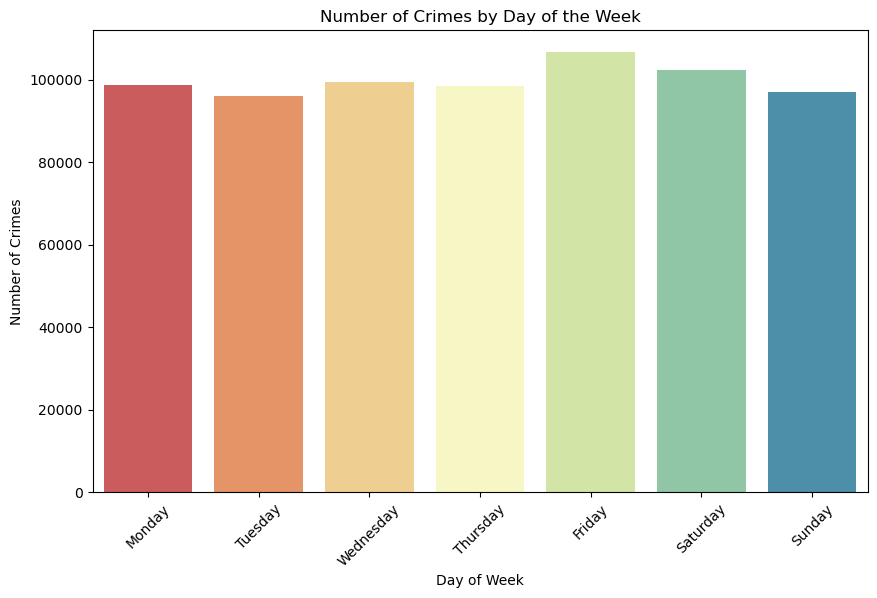

In [49]:
data['DayOfWeek'] = data['DATE OCC'].dt.day_name()

day_of_week_counts = data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Spectral')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Day of the Week')
plt.xticks(rotation=45)

The distribution of reported crimes across different days of the week in Los Angeles reveals varied patterns of activity. Fridays stand out with the highest incidence, totaling 106,702 incidents, possibly reflecting increased social activities or behaviors associated with the end of the workweek. Saturdays follow closely behind with 102,359 incidents, indicating continued activity into the weekend.

Weekdays show relatively consistent numbers, with Wednesday seeing the highest mid-week count at 99,309 incidents. Tuesdays, on the other hand, record the lowest count among weekdays at 96,005 incidents. Understanding these patterns can inform law enforcement strategies, resource allocation, and community outreach efforts aimed at enhancing safety and reducing crime throughout the week in different areas of the city.

#### Occurence of crime based on hour of a day

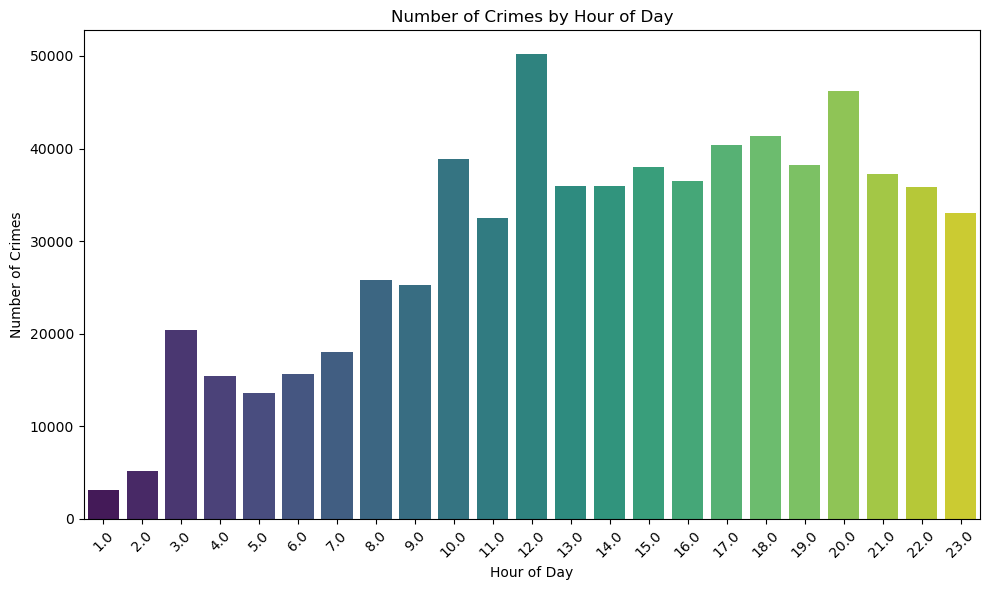

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['HourOfDay'].value_counts().index, y=data['HourOfDay'].value_counts().values, palette='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of Day')
plt.xticks(rotation=45)
plt.tight_layout()

The distribution of crime incidents throughout the day in Los Angeles reveals distinct patterns of activity. Crime rates peak sharply around noon, with 33,084 reported incidents, indicating a significant amount of activity during midday hours. There's a subsequent slight decrease in incidents post-noon, followed by a gradual increase leading up to the evening hours, peaking again around 11:00 PM. In the early morning, from midnight to around 2:00 AM, crime rates are notably lower, gradually increasing after 3:00 AM and reaching a peak again in the late morning. These fluctuations highlight periods of heightened and reduced criminal activity, crucial for law enforcement strategies aimed at effective resource allocation and targeted intervention efforts across different times of the day in the city.

#### Areas with highest crimes

In [51]:
data.groupby('AREA NAME')['AREA NAME'].count().sort_values(ascending=False)

AREA NAME
Central        46537
77th Street    44241
Pacific        40726
Southwest      39027
Hollywood      37518
Southeast      35573
Olympic        35270
N Hollywood    35062
Newton         34554
Wilshire       33001
Rampart        32407
West LA        32137
Northeast      30262
Van Nuys       29476
West Valley    29160
Harbor         29012
Topanga        28385
Devonshire     28283
Mission        28028
Hollenbeck     26362
Foothill       23651
Name: AREA NAME, dtype: int64

Text(0.5, 1.0, 'Crimes by Area')

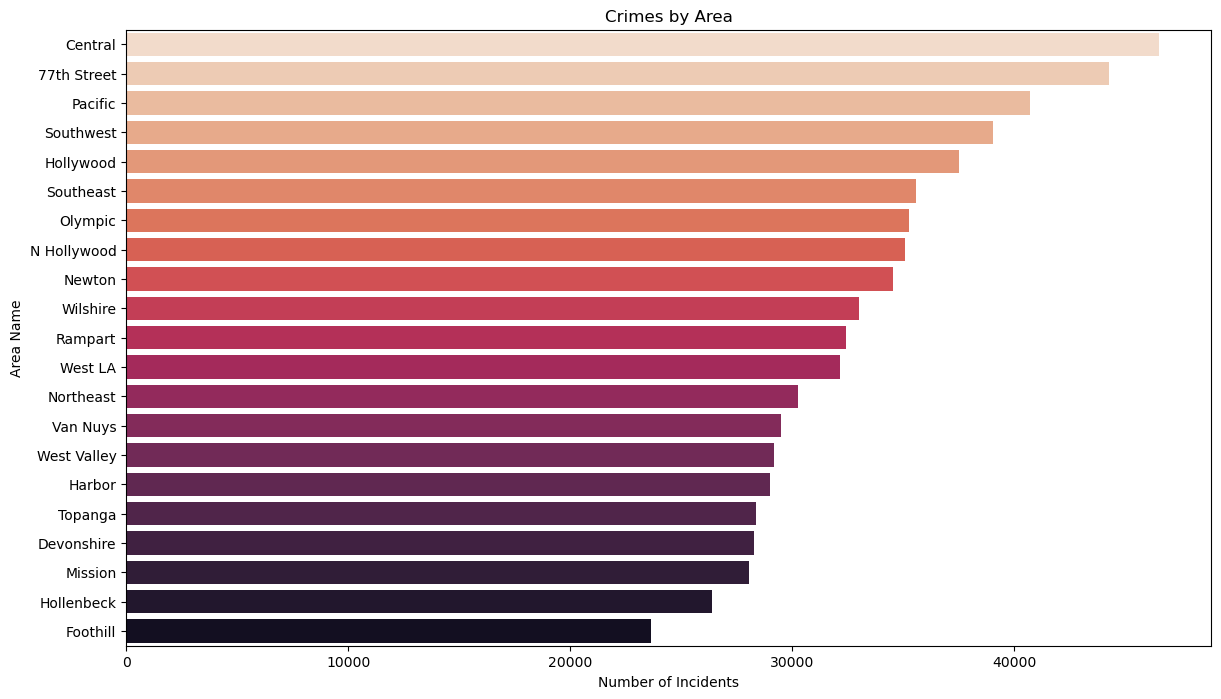

In [52]:
plt.figure(figsize=(14, 8))
area_counts = data['AREA NAME'].value_counts()
sns.barplot(x=area_counts.values, y=area_counts.index, palette='rocket_r')
plt.xlabel('Number of Incidents')
plt.ylabel('Area Name')
plt.title('Crimes by Area')

Central has the highest number of reported incidents with 46,537 incidents, followed closely by 77th Street with 44,241 incidents, and Pacific with 40,726 incidents. Southwest, Hollywood, and Southeast areas also report substantial numbers of incidents, each exceeding 35,000 cases. Conversely, Foothill and Hollenbeck have comparatively lower reported incidents with 23,651 and 26,362 incidents respectively.

This distribution provides a snapshot of the varying levels of reported crime across different areas in Los Angeles, highlighting areas where incidents are more concentrated and potentially indicating areas of focus for law enforcement and community safety initiatives.

#### Weapons used for crimes

In [53]:
weapon_counts = data['Weapon Desc'].value_counts().head(20)
weapon_counts

Weapon Desc
No weapons identified                             455724
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    130637
UNKNOWN WEAPON/OTHER WEAPON                        25301
VERBAL THREAT                                      17706
HAND GUN                                           15013
SEMI-AUTOMATIC PISTOL                               5530
KNIFE WITH BLADE 6INCHES OR LESS                    5102
UNKNOWN FIREARM                                     4976
OTHER KNIFE                                         4342
MACE/PEPPER SPRAY                                   2697
VEHICLE                                             2441
ROCK/THROWN OBJECT                                  2129
PIPE/METAL PIPE                                     1873
BOTTLE                                              1852
STICK                                               1740
FOLDING KNIFE                                       1686
CLUB/BAT                                            1579
AIR PISTOL/REVOLVER

Text(0.5, 1.0, 'Top 20 Weapon Types Used in Crimes')

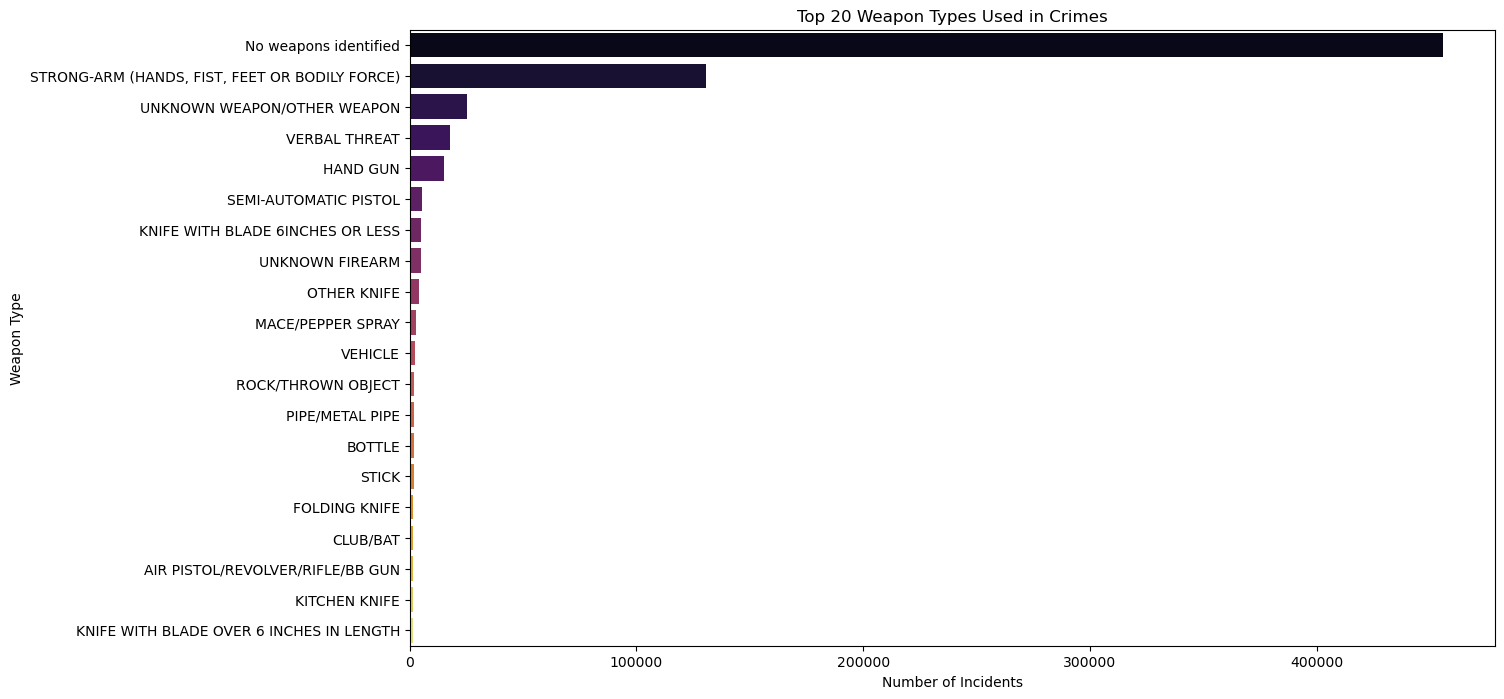

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='inferno')
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon Type')
plt.title('Top 20 Weapon Types Used in Crimes')


The data on weapon descriptions in reported incidents reveals a predominant trend where a significant number of cases involve no identified weapons or are attributed to physical force such as strong-arm tactics. This suggests that a considerable portion of reported crimes in Los Angeles may involve interpersonal altercations or threats without the use of traditional weapons.

The presence of various types of weapons, including firearms, knives, and improvised items like bottles or rocks, underscores the diversity in methods used in criminal activities.

#### Crime status distribution

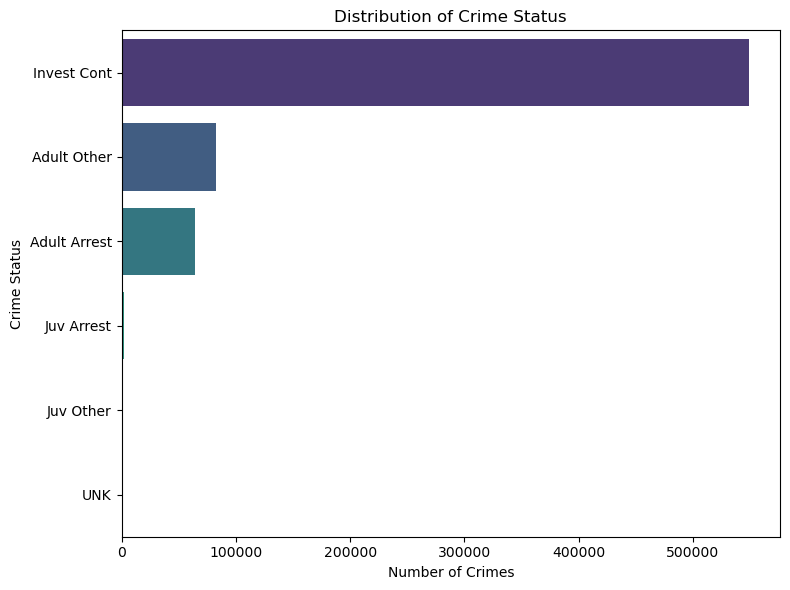

In [55]:
plt.figure(figsize=(8, 6))
status_counts = data['Status Desc'].value_counts()
sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Status')
plt.title('Distribution of Crime Status')
plt.tight_layout()

 The distribution of crime statuses in your dataset shows that the majority of cases are categorized as "Invest Cont" (Investigation Continued), followed by "Adult Other" and "Adult Arrest". There are notably fewer cases categorized under "Juv Arrest", "Juv Other", and "Unkn" (Unknown). This distribution can provide insights into how cases are handled or progressed within the criminal justice system.

#### Mocode analysis:

MO codes help law enforcement agencies identify recurring patterns or methods used in criminal activities. By categorizing crimes based on MO codes, analysts can detect similarities across different incidents, aiding in the identification of serial crimes or organized criminal activities.

In [56]:
clean_data = data.dropna(subset=['Mocodes'])

In [57]:
mo_counts = clean_data['Mocodes'].value_counts()
top_mo_codes = mo_counts.head(10)

Text(0.5, 1.0, 'Distribution of Top 10 Modus Operandi Codes')

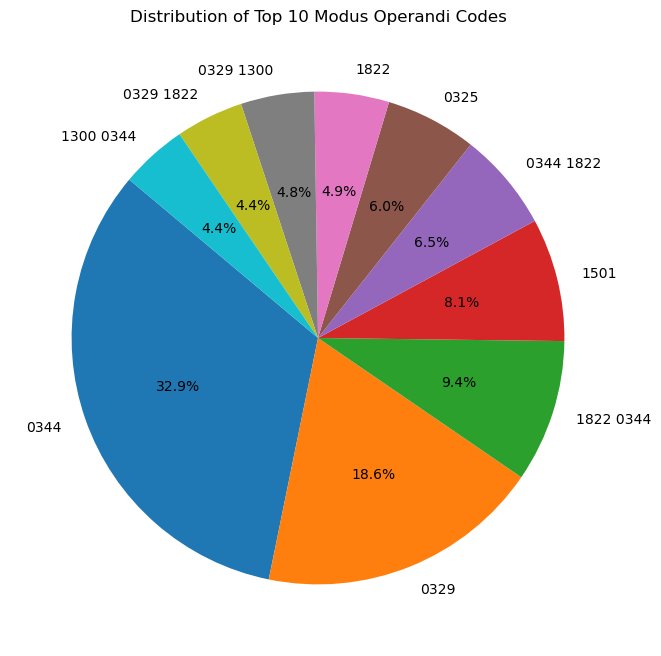

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(top_mo_codes, labels=top_mo_codes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Modus Operandi Codes')

The most frequent Mocodes, like '0344', '0329', '1822', '1501', and their combinations, suggest recurring patterns in criminal behavior observed in Los Angeles. '0344', appearing most frequently, likely indicates a specific method or detail related to crime incidents, possibly involving theft or property-related offenses. Combinations like '1822 0344' and '0329 1822' suggest complex scenarios or multiple elements involved in reported crimes, possibly indicating incidents where multiple tactics or methods were employed.

Understanding these Modus Operandi codes provides valuable insights into how crimes are committed and can inform targeted measures to reduce their occurrence.

#### Top crimes based on Victim age

In [59]:
top_crimes_by_age = df_filtered.groupby('Vict Age')['Crm Cd Desc'].agg(lambda x: x.value_counts().index[0])

top_crimes_df = pd.DataFrame(top_crimes_by_age).reset_index()
top_crimes_df.columns = ['Vict Age', 'Top Crime']

Text(0.5, 1.0, 'Top Crime for Each Age Group')

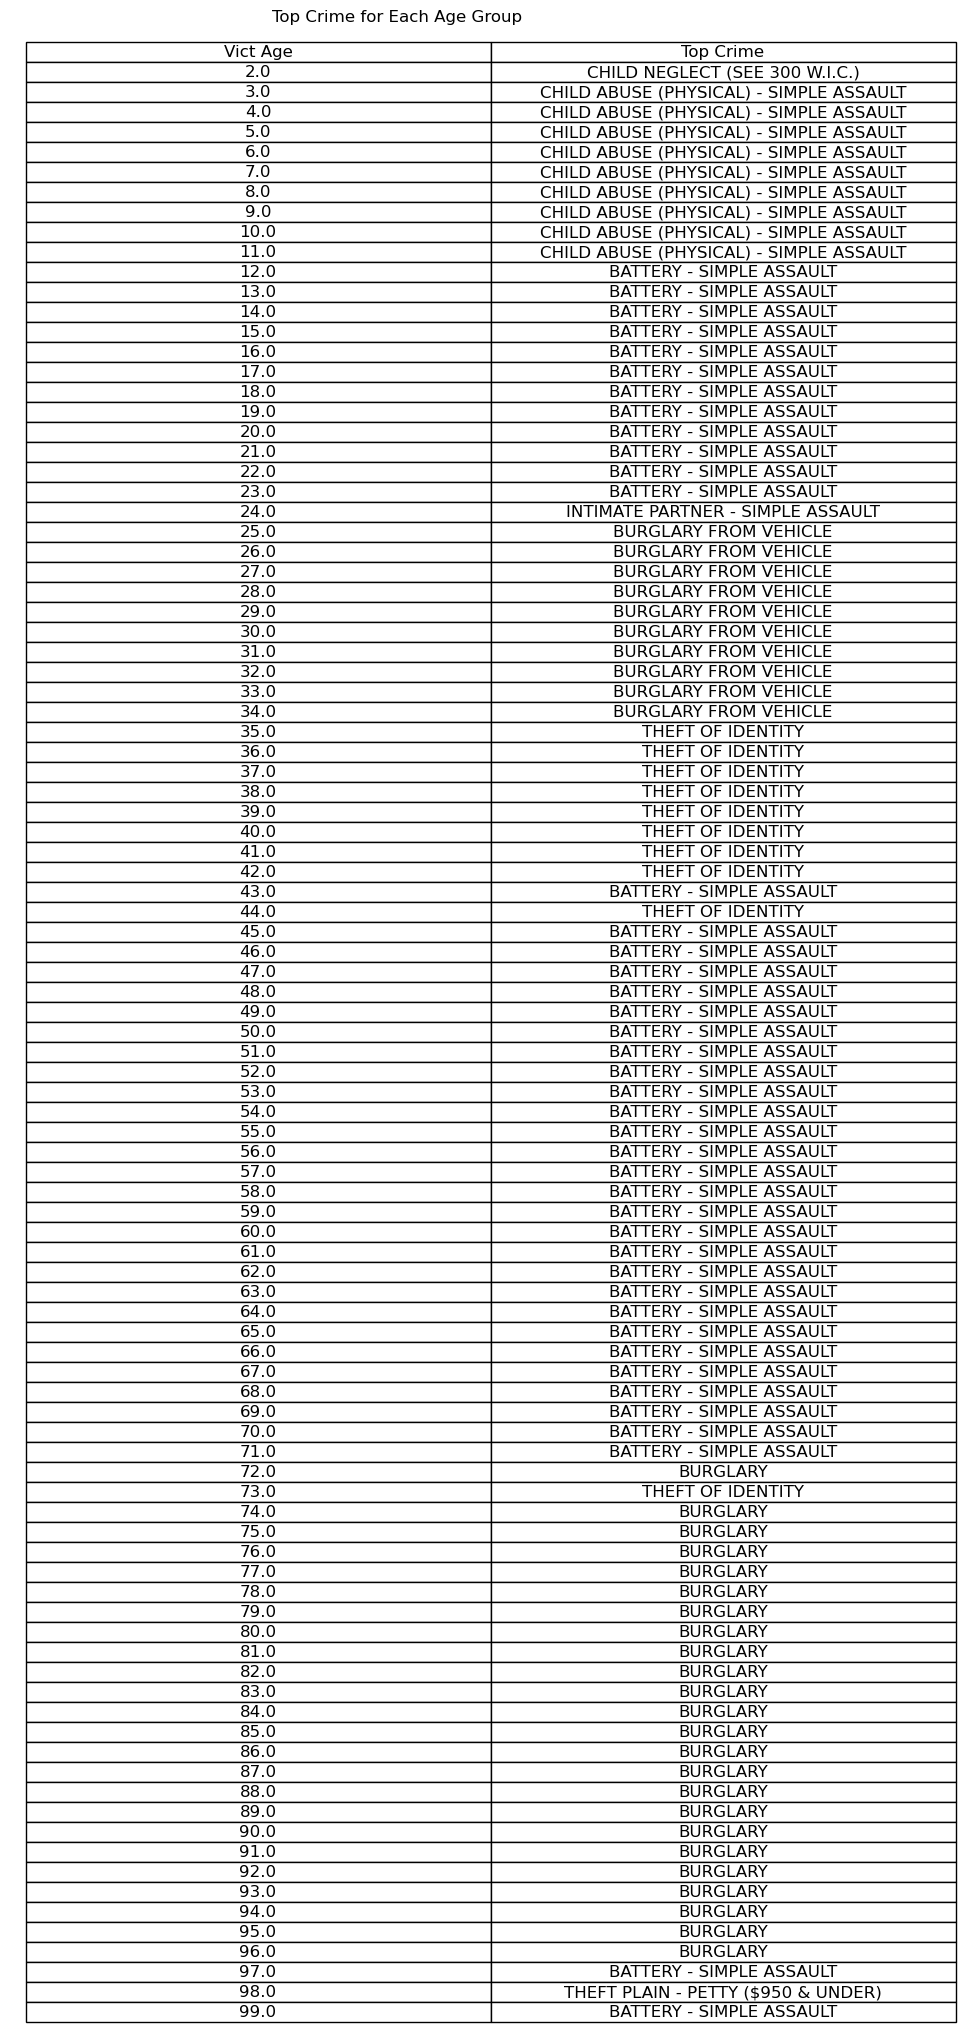

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

table = ax.table(cellText=top_crimes_df.values,
                 colLabels=top_crimes_df.columns,
                 cellLoc='center',
                 loc='upper left')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Top Crime for Each Age Group')

The table provides a clear insight into the predominant types of crimes reported across different age groups in the dataset. It reveals a consistent pattern where crimes related to child abuse and neglect are prevalent among younger age groups, ranging from infants to pre-teens. As age increases into adolescence and early adulthood, the primary reported crime shifts to battery and simple assault. This progression likely reflects both the vulnerability of younger individuals to domestic and caretaker-related incidents, as well as the shift towards interpersonal conflicts and violence as individuals grow older.

#### Top crime in each Area

In [61]:
crime_counts = data.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Count')
total_crimes_per_area = crime_counts.groupby('AREA NAME')['Count'].sum()
crime_counts['Percentage'] = crime_counts.apply(lambda row: (row['Count'] / total_crimes_per_area[row['AREA NAME']]) * 100, axis=1)

top_crimes = crime_counts.loc[crime_counts.groupby('AREA NAME')['Percentage'].idxmax()]

In [62]:
top_crimes = top_crimes.sort_values(by='AREA NAME', ascending=True)
top_crimes.shape

(21, 4)

In [63]:
top_crimes_table = top_crimes[['AREA NAME', 'Crm Cd Desc', 'Percentage']].reset_index(drop=True)
print(top_crimes_table)

      AREA NAME               Crm Cd Desc  Percentage
0   77th Street          VEHICLE - STOLEN   12.746095
1       Central     BURGLARY FROM VEHICLE   13.737456
2    Devonshire          VEHICLE - STOLEN    9.468585
3      Foothill          VEHICLE - STOLEN   12.654856
4        Harbor          VEHICLE - STOLEN   13.584034
5    Hollenbeck          VEHICLE - STOLEN   16.083757
6     Hollywood  BATTERY - SIMPLE ASSAULT    8.915720
7       Mission          VEHICLE - STOLEN   13.711289
8   N Hollywood          VEHICLE - STOLEN    9.377674
9        Newton          VEHICLE - STOLEN   15.645077
10    Northeast          VEHICLE - STOLEN   12.153856
11      Olympic          VEHICLE - STOLEN   10.842075
12      Pacific          VEHICLE - STOLEN   10.482247
13      Rampart          VEHICLE - STOLEN   10.892708
14    Southeast          VEHICLE - STOLEN   13.406235
15    Southwest          VEHICLE - STOLEN   10.551669
16      Topanga         THEFT OF IDENTITY    8.599612
17     Van Nuys          VEH

This table summarizes the predominant crime type and its percentage contribution within each specific area in Los Angeles. It highlights variations in crime patterns across different neighborhoods, emphasizing the prevalence of specific offenses like vehicle theft, burglary, and assault in various areas. Such insights are crucial for law enforcement agencies and policymakers in allocating resources and implementing targeted strategies to address local crime challenges effectively.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698672 entries, 190326475 to }
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Rptd        698672 non-null  datetime64[ns]
 1   DATE OCC         698671 non-null  datetime64[ns]
 2   TIME OCC         682963 non-null  datetime64[ns]
 3   AREA             698672 non-null  float64       
 4   AREA NAME        698672 non-null  object        
 5   Rpt Dist No      698672 non-null  float64       
 6   Part 1-2         698672 non-null  float64       
 7   Crm Cd           698672 non-null  float64       
 8   Crm Cd Desc      698672 non-null  object        
 9   Mocodes          602604 non-null  object        
 10  Vict Age         698672 non-null  float64       
 11  Vict Sex         607450 non-null  object        
 12  Vict Descent     607446 non-null  object        
 13  Premis Cd        698672 non-null  float64       
 14  Premis Desc      69830